In [1]:
from utils.csv_to_pd import *
import pandas as pd
import matplotlib.pyplot as plt

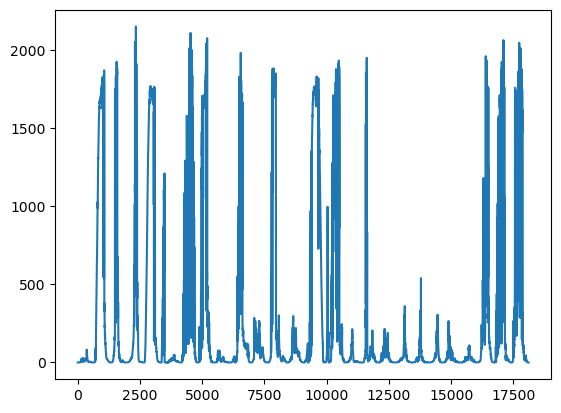

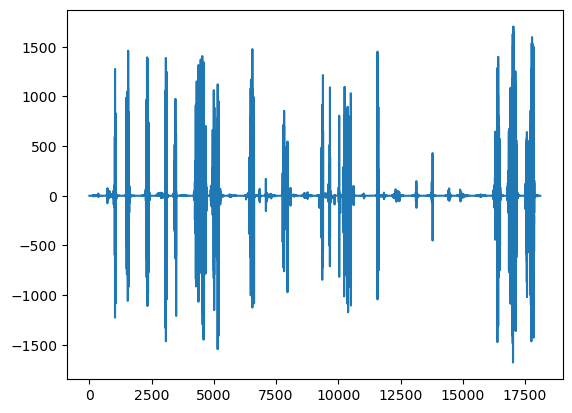

In [7]:

dataset = pd.read_csv('train/L1_Train.csv', engine='python', skipfooter=3)
# 一階差分

dataset['month'] = pd.to_datetime(dataset['DateTime']).dt.month
month_dataset = dataset[dataset['month'] == 1]

plt.plot(month_dataset['Power(mW)'])
plt.show()

dataset1 = month_dataset['Power(mW)'].diff(1)
plt.plot(dataset1)
plt.show()

In [4]:
df = read_dir_csv()
df = mean_min(df)


In [5]:
# from sklearn.preprocessing import StandardScaler

# # 指定要標準化的欄位
# columns_to_standardize = ['WindSpeed(m/s)', 'Pressure(hpa)', 'Temperature(°C)', 'Humidity(%)', 'Sunlight(Lux)']

# # 初始化 StandardScaler
# scaler = StandardScaler()

# # 對指定欄位進行標準化
# df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])

In [6]:
df[:3]

,DateTime,LocationCode,WindSpeed(m/s),Pressure(hpa),Temperature(°C),Humidity(%),Sunlight(Lux),Power(mW)
0,2024-03-01 17:10:00,10.0,0.124286,1017.490,15.712857,93.771429,652.797143,0.115714
1,2024-03-01 17:20:00,10.0,0.314000,1017.446,15.711000,94.012000,455.334000,0.063000
2,2024-03-01 17:30:00,10.0,0.052000,1017.514,15.628000,94.477000,290.917000,0.022000


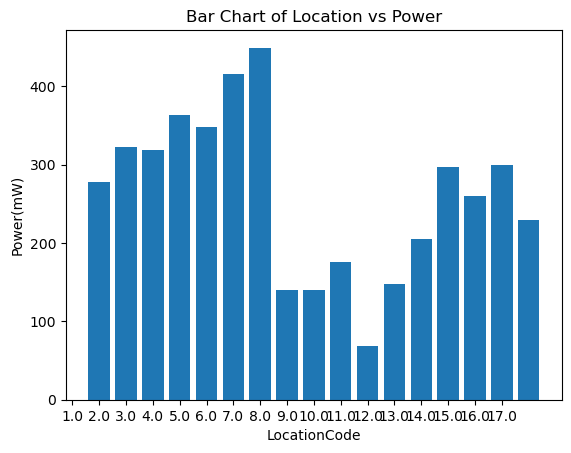

In [7]:
location_df = df.groupby('LocationCode').mean().reset_index()

# 繪製柱狀圖
plt.bar(location_df['LocationCode'], location_df['Power(mW)'])

# 添加標題和軸標籤
plt.title('Bar Chart of Location vs Power')
plt.xlabel('LocationCode')
plt.ylabel('Power(mW)')
plt.xticks(ticks=range(len(location_df)), labels=location_df['LocationCode'])
# 顯示圖表
plt.show()

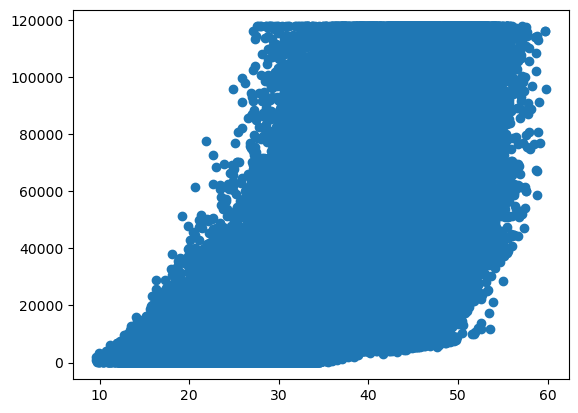

In [12]:
plt.scatter(df['Temperature(°C)'], df['Sunlight(Lux)'])
plt.show()

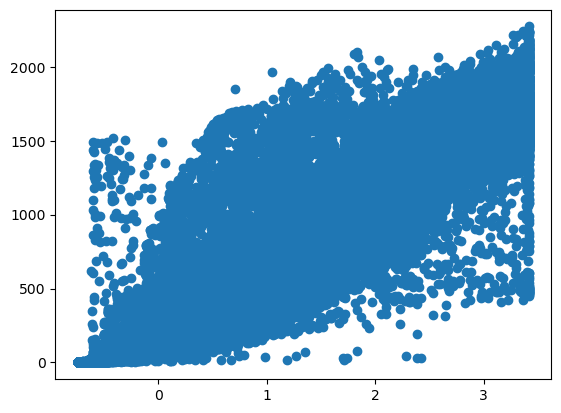

In [11]:
plt.scatter(df["Sunlight(Lux)"], df['Power(mW)'])
plt.show()

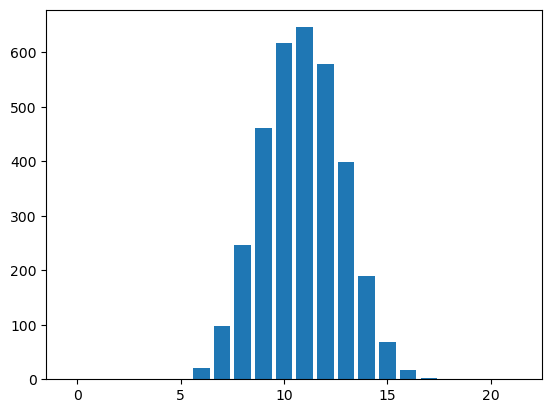

In [15]:
df['hour'] = df['DateTime'].dt.hour
hour_group = df.groupby('hour').mean().reset_index()
plt.bar(hour_group['hour'], hour_group['Power(mW)'])
plt.show()

1


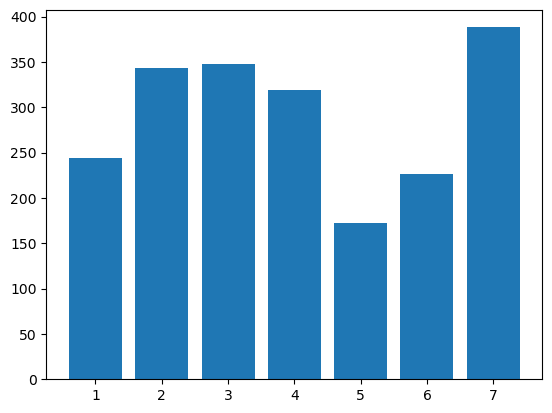

2


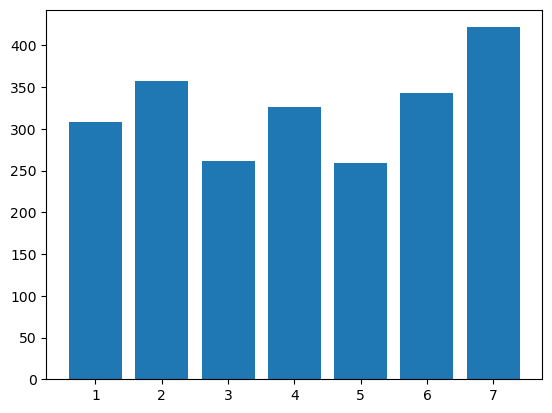

3


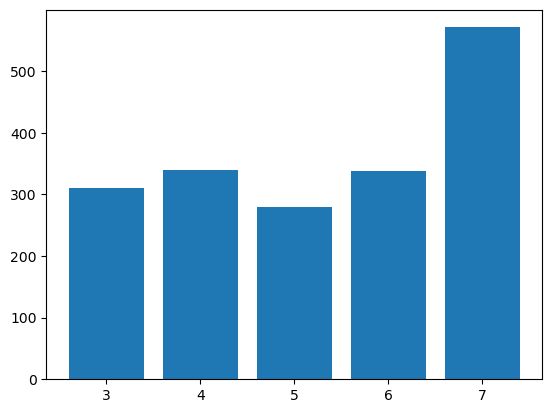

4


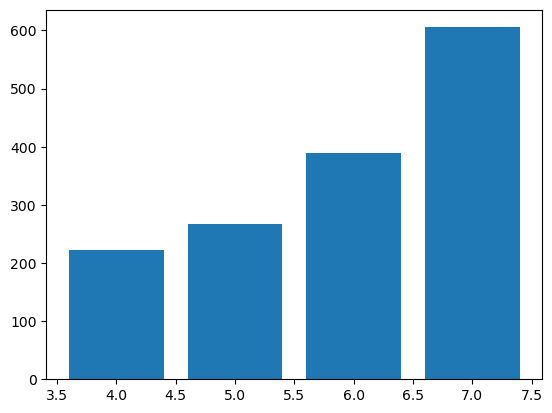

5


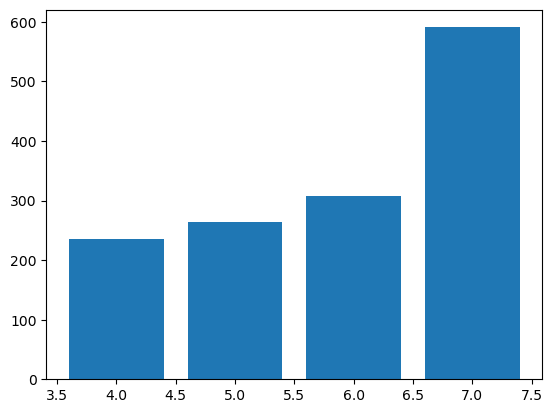

6


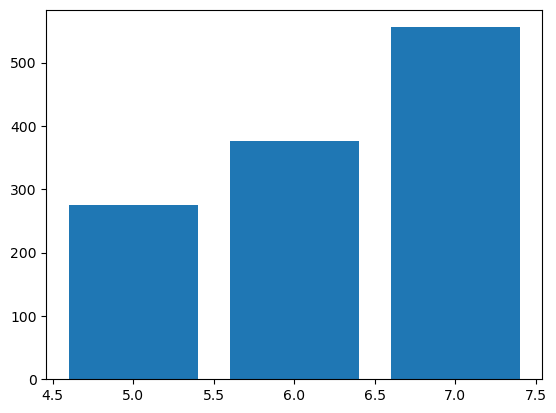

7


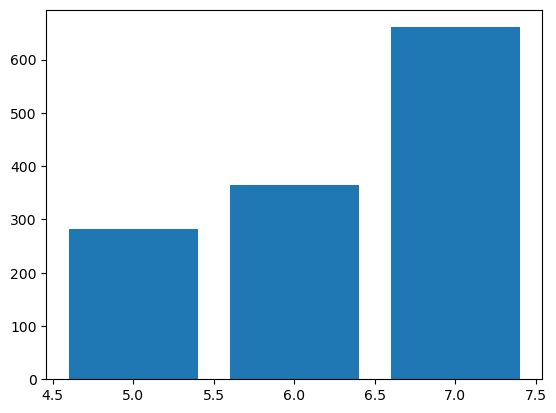

8


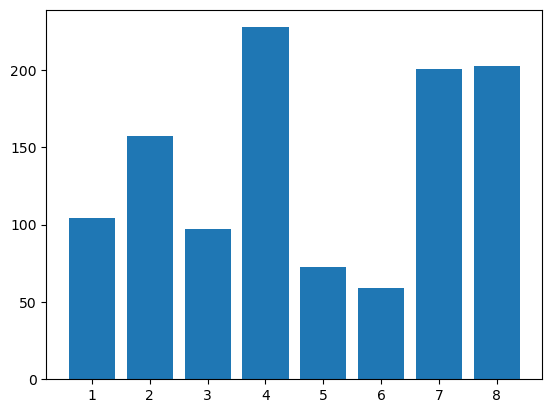

9


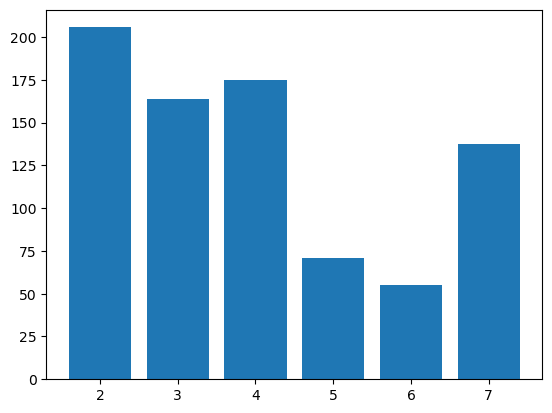

10


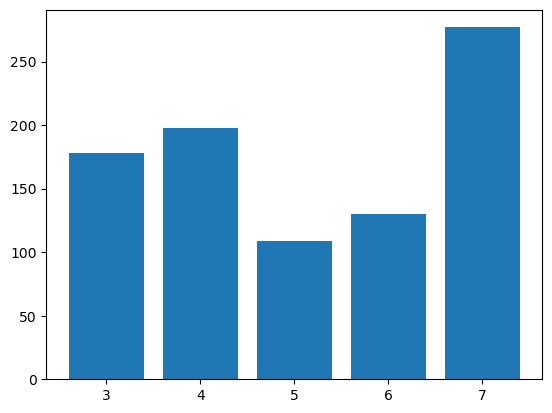

11


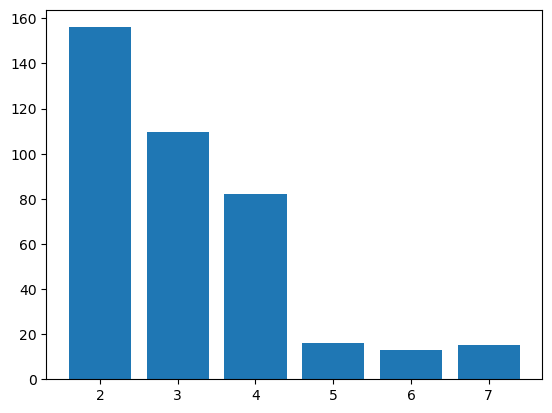

12


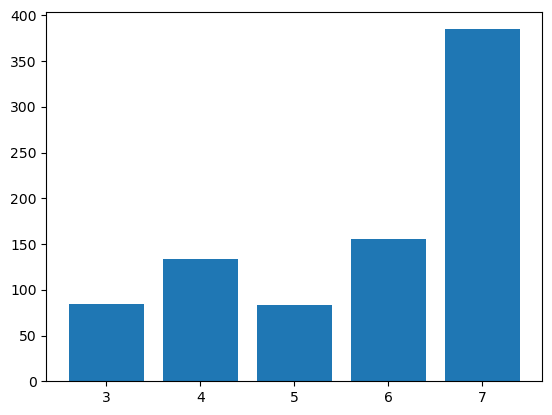

13


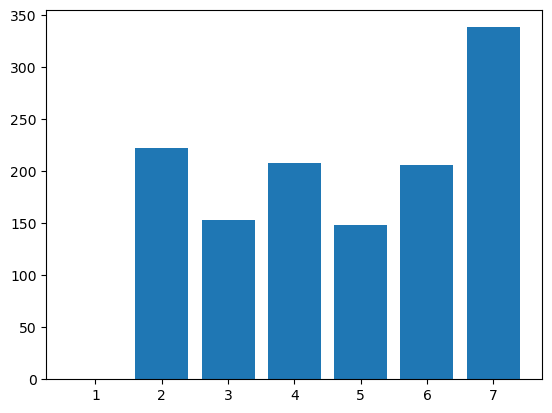

14


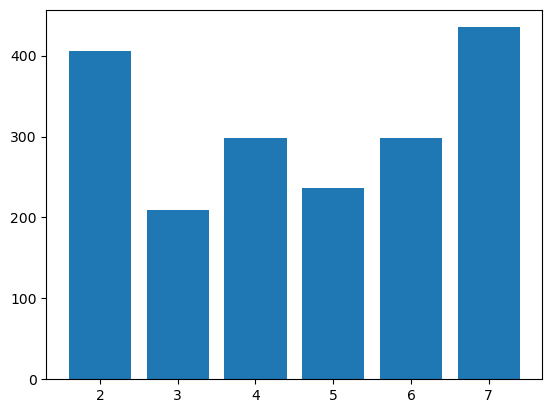

15


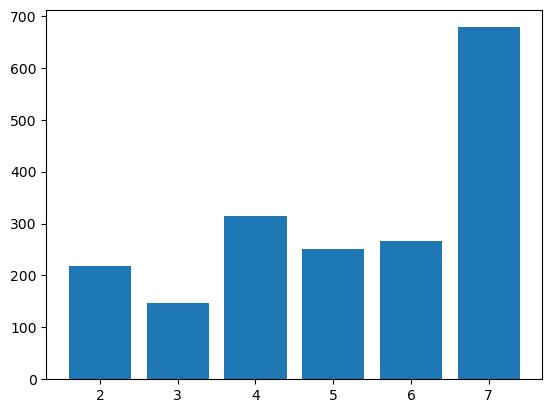

16


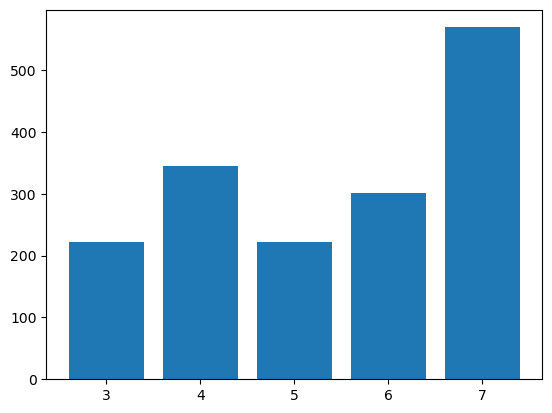

17


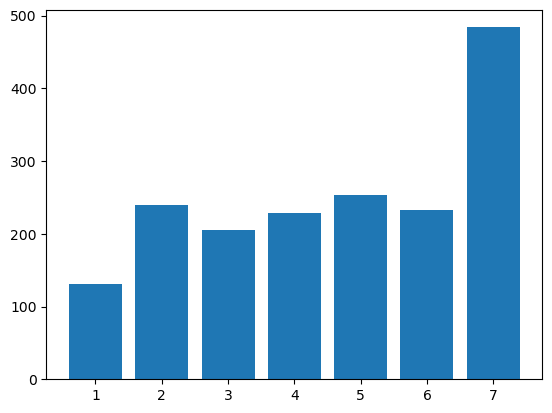

In [18]:
df['month'] = df['DateTime'].dt.month
month_group = df.groupby(['LocationCode', 'month']).mean().reset_index()

locations = list(month_group['LocationCode'].unique())

for location in locations:
    print(location)
    location_data = month_group[month_group['LocationCode'] == location]
    plt.bar(location_data['month'], location_data['Power(mW)'])
    plt.show()

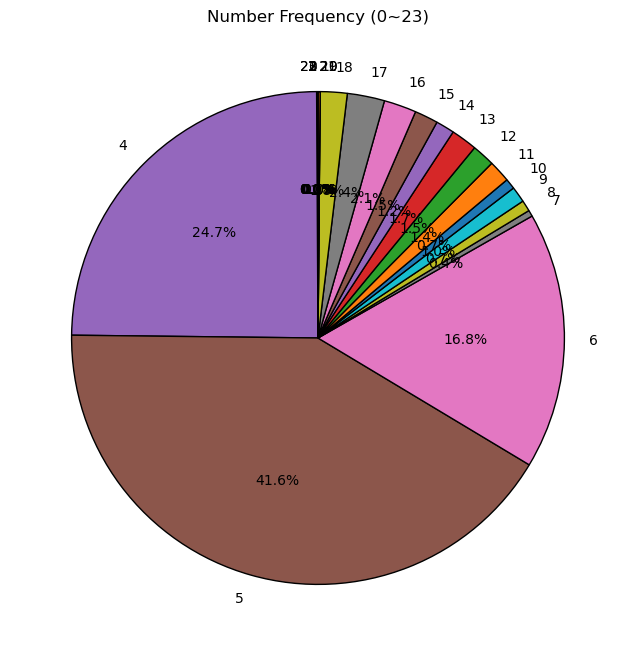

In [5]:
location_ori = list(df["LocationCode"]) 
data_list, label_list, start_time = spilt_data_with_datetime(df, location_ori)

count = Counter(start_time)

# 確保包含所有 0~23 的數字，即使次數為 0
full_count = {i: count.get(i, 0) for i in range(24)}

# 分別提取數字（標籤）和次數（數據）
labels = list(full_count.keys())
sizes = list(full_count.values())

# 繪製圓餅圖
plt.figure(figsize=(8, 8))  # 設定圖表大小
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',  # 自動顯示百分比
    startangle=90,      # 起始角度
    wedgeprops={'edgecolor': 'black'}  # 添加邊框
)

# 添加標題
plt.title('Number Frequency (0~23)')

# 顯示圖表
plt.show()